# Exploratory Data Analysis in Action -  Loading and exploring the data set

**Import statements**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Global settings**

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100
#pd.set_option('display.max_colwidth', -1)
plt.rcParams["figure.figsize"] = [15,6]

## Inspect the raw data set

It is good practice to inspect the data set before loading into Python. If we are dealing with text-like data we may inspect the data set using our favorite text editor or simply using the shell. 

When working with Jupyter notebooks we may use the notebook magic command `!` to execute shell commands form within a code cell.

The data set is found in the `datasets` folder:

    ../datasets/operations.csv


In order to look at the first 20 lines of the text file we use the bash command `head -20 PATH_TO_FILE/FILENAME`.

In [15]:
!head -20 ../datasets/operations.csv

Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target ID,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Airborne Aircraft,Attacking Aircraft,Bombing Aircraft,Aircraft Returned,Aircraft Failed,Aircraft Damaged,Aircraft Lost,High Explosives,High Explosives Type,High Explosives Weight (Pounds),High Explosives Weight (Tons),Incendiary Devices,Incendiary Devices Type,Incendiary Devices Weight (Pounds),Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,,,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,40675,ITALY,SPADAFORA,,,,38.22,15.37,,20,,20,

## Load data set

In [16]:
PATH = "../datasets/"
df_raw = pd.read_csv(PATH + "operations.csv", low_memory=False)

## Review proporties of the pandas object

**Number of rows and columns**

In [6]:
df_raw.shape

(178281, 46)

**Memory usage** (Check out the [blog entry of Josh Devlin](https://www.dataquest.io/blog/pandas-big-data/) for a deep dive into memory management with pandas)

In [32]:
df_raw.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Columns: 46 entries, Mission ID to Source ID
dtypes: float64(22), int64(1), object(23)
memory usage: 215.1 MB


**Inspect columns and row**

In [23]:
df_raw.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target ID,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Airborne Aircraft,Attacking Aircraft,Bombing Aircraft,Aircraft Returned,Aircraft Failed,Aircraft Damaged,Aircraft Lost,High Explosives,High Explosives Type,High Explosives Weight (Pounds),High Explosives Weight (Tons),Incendiary Devices,Incendiary Devices Type,Incendiary Devices Weight (Pounds),Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,40675,ITALY,SPADAFORA,NaN,NaN,NaN,38.220000,15.370000,NaN,20.0,NaN,20.0,NaN,NaN,NaN,NaN,40.0,500 LB GP (GP-M43/M64),NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,NaN,NaN,NaN,NaN,NEW GUINEA,KOMIATUM,RIDGE,NaN,1,-7.166667,147.000000,44.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,40.0,1000 LB GP (GP-M44/M65),NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,9630,ITALY,COSENZA,NaN,NaN,NaN,39.270000,16.250000,NaN,18.0,NaN,36.0,NaN,NaN,NaN,NaN,36.0,500 LB GP (GP-M43/M64),NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,16140,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.430000,15.900000,NaN,15.0,NaN,15.0,NaN,1.0,NaN,NaN,30.0,500 LB GP (GP-M43/M64),NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,NaN,NaN,NaN,NaN,SUMATRA,KILA,VILLAGE,NaN,1,-1.116667,103.883333,60.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,16.0,1000 LB GP (GP-M44/M65),NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0


![](./_img/A36_and_B24.png)

Source: Wikipedia [B24](https://de.wikipedia.org/wiki/Consolidated_B-24), [A36](https://de.wikipedia.org/wiki/North_American_A-36)

In [25]:
df_raw.columns

Index(['Mission ID', 'Mission Date', 'Theater of Operations', 'Country',
       'Air Force', 'Unit ID', 'Aircraft Series', 'Callsign', 'Mission Type',
       'Takeoff Base', 'Takeoff Location', 'Takeoff Latitude',
       'Takeoff Longitude', 'Target ID', 'Target Country', 'Target City',
       'Target Type', 'Target Industry', 'Target Priority', 'Target Latitude',
       'Target Longitude', 'Altitude (Hundreds of Feet)', 'Airborne Aircraft',
       'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
       'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
       'High Explosives', 'High Explosives Type',
       'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
       'Incendiary Devices', 'Incendiary Devices Type',
       'Incendiary Devices Weight (Pounds)',
       'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
       'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
       'Fragmentation Devices Weight (Tons)', 'To

### Data types

In [33]:
df_raw.dtypes

Mission ID                                 int64
Mission Date                              object
Theater of Operations                     object
Country                                   object
Air Force                                 object
Unit ID                                   object
Aircraft Series                           object
Callsign                                  object
Mission Type                              object
Takeoff Base                              object
Takeoff Location                          object
Takeoff Latitude                          object
Takeoff Longitude                        float64
Target ID                                 object
Target Country                            object
Target City                               object
Target Type                               object
Target Industry                           object
Target Priority                           object
Target Latitude                          float64
Target Longitude    

**Categorical variable**

In [40]:
df_raw["Aircraft Series"].describe()

count     178165
unique        74
top          B24
freq       33837
Name: Aircraft Series, dtype: object

**Numeric variable**

In [41]:
df_raw["Aircraft Lost"].describe()

count    158.000000
mean       2.279253
std        6.414377
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       80.000000
Name: Aircraft Lost, dtype: float64

### Explore variables of interest

In [42]:
df_raw["Target Country"].nunique() 

90

In [39]:
df_raw["Target Country"].unique() 

array(['ITALY', 'NEW GUINEA', 'SUMATRA', 'BURMA', 'GERMANY',
       'HOLLAND OR NETHERLANDS', 'FRANCE', 'UNKNOWN OR NOT INDICATED',
       'CORAL SEA AREA', 'SOLOMON ISLANDS', 'BORNEO', 'CHINA',
       'CAROLINE ISLANDS', 'KURILE ISLANDS', 'CELEBES ISLANDS',
       'MARIANAS ISLANDS', 'BISMARK ARCHIPELAGO', 'MANCHURIA', 'JAVA',
       'VOLCANO AND BONIN ISLANDS', 'PHILIPPINE ISLANDS', 'JAPAN',
       'AUSTRIA', 'BELGIUM', 'ALEUTIAN ISLANDS', nan,
       'FORMOSA AND RYUKYU ISLANDS', 'NEW IRELAND', 'MARCUS ISLANDS',
       'GREECE', 'HUNGARY', 'YUGOSLAVIA', 'FRENCH INDO CHINA',
       'MARSHALL ISLANDS', 'PALAU ISLANDS', 'MALAY STATES', 'ROMANIA',
       'INDIA', 'SWITZERLAND', 'ALBANIA', 'LUXEMBOURG', 'POLAND',
       'ALGERIA', 'NORWAY', 'GILBERT ISLANDS', 'CRETE',
       'MALAY STATES MINING', 'SUMATRA MINING', 'CZECHOSLOVAKIA',
       'FORMOSA', 'SARDINIA', 'CHINA MINING', 'BULGARIA',
       'KOREA OR CHOSEN', 'DENMARK', 'GREAT BRITAIN', 'THAILAND OR SIAM',
       'CORSICA', 'LIBYA'

In [43]:
df_raw["Target Country"].value_counts() 

GERMANY                             61744
ITALY                               23689
FRANCE                              22226
BURMA                                8259
PHILIPPINE ISLANDS                   8180
NEW GUINEA                           7213
AUSTRIA                              4380
CHINA                                4060
HOLLAND OR NETHERLANDS               3560
BISMARK ARCHIPELAGO                  3484
CELEBES ISLANDS                      3094
JAPAN                                2748
UNKNOWN OR NOT INDICATED             2742
BELGIUM                              2149
TUNISIA                              1978
FORMOSA AND RYUKYU ISLANDS           1803
SOLOMON ISLANDS                      1689
BORNEO                               1399
CAROLINE ISLANDS                     1032
CZECHOSLOVAKIA                        995
VOLCANO AND BONIN ISLANDS             966
YUGOSLAVIA                            944
HUNGARY                               874
ROMANIA                           

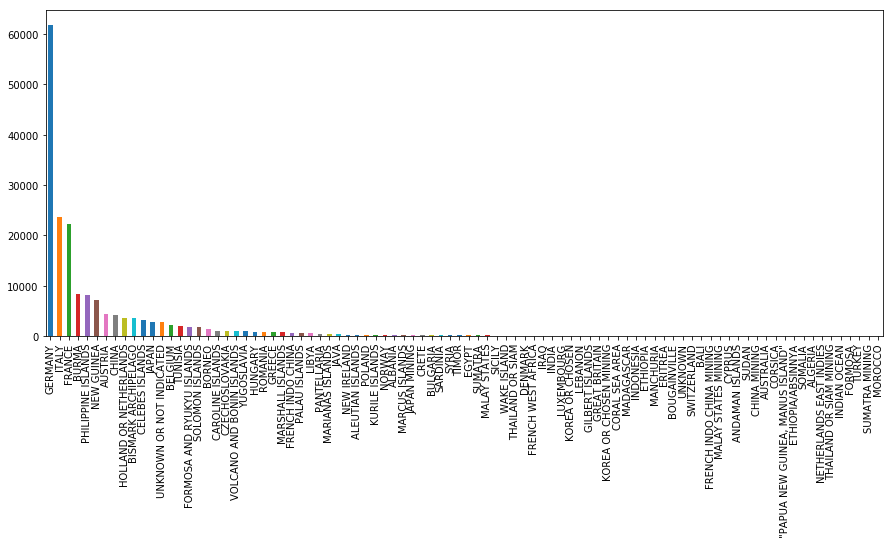

In [48]:
df_raw["Target Country"].value_counts().plot.bar()

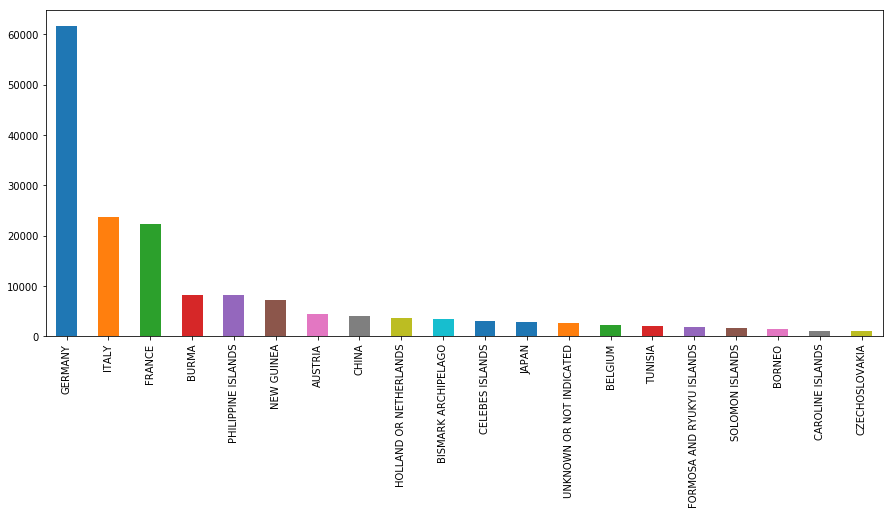

In [50]:
df_raw["Target Country"].value_counts()[:20].plot.bar();